# Problem Context

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it.



# Problem Statement

**Objective**

The goal is to come up with a pricing model that can effectively predict the price of used cars and help the business in devising profitable strategies.

In [ ]:
##Connect to Google drive to read and write to files
from google.colab import drive
drive.mount('/content/drive')

#libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

#libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#command to tell python to actually display the graphs
%matplotlib inline

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_squared_error

# to supress warnings
import warnings
warnings.filterwarnings('ignore') 

#Read the csv into a dataframe
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/used_cars_data.csv')

Mounted at /content/drive


In [ ]:
data[data['Price'] > data['New_Price']].shape[0]

73

In [ ]:
#Verifying the file has been sucessfully loaded
print(f'There are {data.shape[0]} rows and {data.shape[1]} columns in the dataset')  

# Setting the random seed in order to get back the same results every run
np.random.seed(1)
data.sample(n=10)

There are 7253 rows and 14 columns in the dataset


,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2397,2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.0,9.47,6.00
3777,3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5 kmpl,1197 CC,81.80 bhp,5.0,5.44,4.11
4425,4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1 kmpl,2499 CC,141 bhp,7.0,35.29,6.00
3661,3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,86.97,35.28
4514,4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9 kmpl,1197 CC,82 bhp,5.0,8.23,6.34
599,599,Toyota Innova Crysta 2.8 ZX AT,Coimbatore,2019,40674,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,7.0,28.05,24.82
186,186,Mercedes-Benz E-Class E250 CDI Avantgrade,Bangalore,2014,37382,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,86.97,32.00
305,305,Audi A6 2011-2015 2.0 TDI Premium Plus,Kochi,2014,61726,Diesel,Automatic,First,17.68 kmpl,1968 CC,174.33 bhp,5.0,67.10,20.77
4582,4582,Hyundai i20 1.2 Magna,Kolkata,2011,36000,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.0,10.25,2.50
5434,5434,Honda WR-V Edge Edition i-VTEC S,Kochi,2019,13913,Petrol,Manual,First,17.5 kmpl,1199 CC,88.7 bhp,5.0,9.36,8.20


**Data Dictionary**

S.No.: Serial number

Name: Name of the car which includes brand name and model name

Location: Location in which the car is being sold or is available for purchase (cities)

Year: Manufacturing year of the car

Kilometers_driven: The total kilometers (a unit used to measure length or distance) driven in the car by the previous owner(s)

Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

Transmission: The type of transmission used by the car (Automatic/Manual)

Owner: Type of ownership

Mileage: The standard mileage offered by the car company in kmpl or km/kg

Engine: The displacement volume of the engine in CC

Power: The maximum power of the engine in bhp

Seats: The number of seats in the car

New_Price: The price of a new car of the same model in INR Lakhs (1 Lakh INR = 100,000 INR)

Price: The price of the used car in INR Lakhs


In [ ]:
#Getting insights into the Data Structure
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 793.4+ KB


We have 6 numerical data types (3 int and 3 float) and the remaining 8 are ojbect types. Memory usage is at around 736.8K. We have 5 columns(Mileage, Engine, Power, Seats and Price) that have data missing. Price being the dependent variable also has data missing. 

In [ ]:
#Retrieving the Statistical Summary of all the 14 columns 
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
S.No.,7253.0,NaN,NaN,NaN,3626.0,2093.905084,0.0,1813.0,3626.0,5439.0,7252.0
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251,450,17.0 kmpl,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,7207,150,1197 CC,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN



1.   The Name column has 2041 unique values - we are looking at 2041 unique car brands/models.  'Mahindra XUV500 W8 2WD' appears 55 times and seems to be the most sold car.
2.   The **Location **column has 11 unique values. Most cars seem to be sold in Mumbai as this location seems to be the most frequent in the dataset appearing 948 times. **This column is a good candidate to be converted into the Categorial type.**
3.   The Year column contains data from 1996 to 2019. 50% of the cars sold(or available for sale) are models manufactured between 2011 and 2016. 
4.   Kilometers_Driven column has data ranging between 171 and 6500000. 50% of the cars seem to have recorded between 34000 and 73000 kilometers. On an average, the cars sold seem to have recorded 58.7K kilometers. 
5.   **Fuel_Type** column has 5 unique values. 3852 (out of 7252 total cars)  seem to be Diesel cars. **This column is a good candidate to be converted into the Categorial type.**
6.   **Transmission column** has 2 unique values. 5203 (out of 7252 total cars sold) have manual transmission. **This column is a good candidate to be converted into the Categorial type.**
7.   **Owner_Type** column has 4 unique values. Majority of the cars seem to have had just one owner (5951 out of 7252). **This column is a good candidate to be converted into the Categorial type.**
8.   **Mileage** column has 17.0 kmpl as its frequent entry. **Since this column contains the unit (kmpl), we need to verify that all values are in kmpl.**  
9.   **Engine** column has 1197 CC as its frequent entry. ***This column too has a unit (CC) and good to verify that all values are in CC. ***
10.  **Power **column has 74 bhp as the frequent entry. **Need to verify that all values in the column use the same bhp unit.**
11.  **Seats** - Most cars in the dataset seem to be 5 seaters. Max number of seats is 10.***Given the minimum number of seats is 0, we might have bad data in this column that needs to be looked into. ***
12.   New_Price holds the price of a brand new car of the same model/brand. This column has a wide range from 3.91 to 375 Lakhs. Has a mean of 21.3 and a median of 11.3 indicating existance of outliers. 
13.   **Price **of the used cars ranges from 0.44 to 160 Lakhs. 50% of the cars sold were priced between 3.5 and 9.95 Lakhs. Price is the **dependent variable**.

The S.No. column which is of int type will add no value to our prediction and hence can be dropped.

In [ ]:
data.drop('S.No.', axis=1, inplace=True)

With the understanding of the data structure and the statistical summary, lets dive into **Data PreProcessing**.



**Handling Duplicates**

In [ ]:
#Checking for duplicates
data.duplicated().sum()

1

In [ ]:
#We only have one duplcicate row, dropping it
data.drop_duplicates(keep='last',inplace=True)
data.duplicated().sum()

0

**Gaining insights into the amount of data missing**

In [ ]:
#Check for missing values across all the columns
data.isnull().sum().sort_values(ascending=False)

Price                1233
Power                 175
Seats                  53
Engine                 46
Mileage                 2
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
New_Price               0
dtype: int64

In [ ]:
#Calculate the percentage of data missing in each column
(data.isnull().sum()/data.shape[0])*100


Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027579
Engine                0.634308
Power                 2.413127
Seats                 0.730833
New_Price             0.000000
Price                17.002206
dtype: float64

The dependent column, Price has about 17% of data missing. The Power column has about 2 percent of data missing and the remaining 3 columns (Mileage, Engine and Seats) have less than 1% data missing.

In [ ]:
#Lets drop the rows with missing Price (dependent variable) information
data = data.dropna(subset=['Price'])
data['Price'].isnull().sum()


0

In [ ]:
#Checking the data size
data.shape[0]

6019

We now have 6019 rows in the dataset.

**Feature Engineering**

In [ ]:
#Name contains Brand and Model and description information. 
#Extracting just the brand information into a new variable called Brand

data['Brand'] = data['Name'].str.split(' ', n=1, expand=True)[0]

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5876 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          6019 non-null   float64
 12  Price              6019 non-null   float64
 13  Brand              6019 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 705.4+ KB


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74,Audi


In [ ]:
#Verifying there isnt any missing data in the newly created Brand Column
data['Brand'].isnull().sum()

0

In [ ]:
#Number of unique entries in the Brand column
data['Brand'].nunique()

31

In [ ]:
#Retrieving all the unique values in the Brand column and inspecting the data for any issues
data['Brand'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini'], dtype=object)

Looks like Isuzu and ISUZU are being counted as 2 different categories. Also Brands with spaces in them need updating - 'Land Rover'

In [ ]:
#Correcting Brand names (Isuzu, Land Rover)

data['Brand'] = data['Brand'].replace('ISUZU', 'Isuzu')
data['Brand'] = data['Brand'].replace('Land', 'Land Rover')

print(data['Brand'].unique().tolist())

['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota', 'Volkswagen', 'Tata', 'Land Rover', 'Mitsubishi', 'Renault', 'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun', 'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep', 'Smart', 'Ambassador', 'Isuzu', 'Force', 'Bentley', 'Lamborghini']


In [ ]:
#Verifying that we now have 30 unique Brands
data['Brand'].nunique()

30

In [ ]:
#Stripping out spaces from both ends of the values in the Brand column in order to avoid running into mapping issues while assigning tiers (based on the average prices)
data['Brand'].str.rstrip()
data['Brand'].str.lstrip()

0          Maruti
1         Hyundai
2           Honda
3          Maruti
4            Audi
          ...    
6014       Maruti
6015      Hyundai
6016     Mahindra
6017       Maruti
6018    Chevrolet
Name: Brand, Length: 6019, dtype: object

In [ ]:
# Group the Brands into 5 different tiers based on the average Price of the Brand
data.groupby(['Brand'])['Price'].mean().sort_values(ascending=False)

Brand
Lamborghini      120.000000
Bentley           59.000000
Porsche           48.348333
Land Rover        39.259500
Jaguar            37.632250
Mini              26.896923
Mercedes-Benz     26.809874
Audi              25.537712
BMW               25.243146
Volvo             18.802857
Jeep              18.718667
Isuzu             14.696667
Toyota            11.580024
Mitsubishi        11.058889
Force              9.333333
Mahindra           8.045919
Skoda              7.559075
Ford               6.889400
Renault            5.799034
Honda              5.411743
Hyundai            5.343433
Volkswagen         5.307270
Nissan             4.738352
Maruti             4.517267
Tata               3.562849
Fiat               3.269286
Datsun             3.049231
Chevrolet          3.044463
Smart              3.000000
Ambassador         1.350000
Name: Price, dtype: float64

In [ ]:
# Generating 'tiers' based on the mean price
tiers = {
'Lamborghini':'First Tier',     
'Bentley':'First Tier',            
'Porsche':'First Tier',           
'Jaguar':'First Tier',           
'Land Rover':'First Tier',            
'Mini':'First Tier',            
'Audi':'Second Tier',            
'Mercedes-Benz':'Second Tier',  
'BMW':'Second Tier',             
'Jeep':'Second Tier',            
'Volvo':'Second Tier',           
'Isuzu':'Second Tier',          
'Mitsubishi':'Third Tier',
'Toyota':'Third Tier',          
'Force':'Third Tier',           
'Mahindra':'Third Tier',        
'Skoda':'Third Tier',           
'Renault':'Third Tier',         
'Volkswagen':'Fourth Tier',      
'Ford':'Fourth Tier',            
'Honda':'Fourth Tier',           
'Nissan':'Fourth Tier',          
'Hyundai':'Fourth Tier',         
'Maruti':'Fourth Tier',          
'Datsun':'Fifth Tier',          
'Fiat':'Fifth Tier',            
'Smart':'Fifth Tier',         
'Tata':'Fifth Tier',            
'Chevrolet':'Fifth Tier',       
'Ambassador':'Fifth Tier'      
}

In [ ]:
# Storing the 5 new categories into a new column called Brand_Tier
data['Brand_Tier'] = data['Brand'].map(tiers)

In [ ]:
#Verify that the Brand_Tier column has only 5 categories
data['Brand_Tier'].unique()

array(['Fourth Tier', 'Second Tier', 'Third Tier', 'Fifth Tier',
       'First Tier'], dtype=object)

In [ ]:
#Inspecting the Location column to bring down the categories
data['Location'].nunique()

11

In [ ]:
# Forming regions based on the geographical location of the cities
regions = {
'Mumbai':'West',
'Hyderabad':'South',
'Coimbatore':'South',
'Kochi':'South',
'Pune':'West',
'Delhi':'North',
'Kolkata':'East',
'Chennai':'East',
'Jaipur':'North',
'Bangalore':'South',
'Ahmedabad':'West'}

In [ ]:
# Mapping the cities into regions and storing the values into a new variable called 'Region'
data['Region'] = data['Location'].map(regions)

In [ ]:
#Converting the eligible object types into categorical fields
data["Brand_Tier"] = data["Brand_Tier"].astype("category")
data["Brand"] = data["Brand"].astype("category")
data["Region"] = data["Region"].astype("category")
data["Fuel_Type"] = data["Fuel_Type"].astype("category")
data["Transmission"] = data["Transmission"].astype("category")
data["Owner_Type"] = data["Owner_Type"].astype("category")
data["Location"] = data["Location"].astype("category")

In [ ]:
#Checking the latest structure
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               6019 non-null   object  
 1   Location           6019 non-null   category
 2   Year               6019 non-null   int64   
 3   Kilometers_Driven  6019 non-null   int64   
 4   Fuel_Type          6019 non-null   category
 5   Transmission       6019 non-null   category
 6   Owner_Type         6019 non-null   category
 7   Mileage            6017 non-null   object  
 8   Engine             5983 non-null   object  
 9   Power              5876 non-null   object  
 10  Seats              5977 non-null   float64 
 11  New_Price          6019 non-null   float64 
 12  Price              6019 non-null   float64 
 13  Brand              6019 non-null   category
 14  Brand_Tier         6019 non-null   category
 15  Region             6019 non-null   category
dtypes: cat

**End of Feature Engineering**

**Fixing Bad Data**

In [ ]:
#Inspecting possible bad data in the Seats Column
data[data['Seats'] == 0.0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Brand_Tier,Region
3999,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,2012,125000,Petrol,Automatic,First,10.5 kmpl,3197 CC,NaN,0.0,53.14,18.0,Audi,Second Tier,South


We got only one entry with 0.0 Seats. Lets check to see if we got any more entries in the dataset for this model & brand. If none found, we will look up the model online and impute the value.   

In [ ]:
data[data['Name']== 'Audi A4 3.2 FSI Tiptronic Quattro']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Brand_Tier,Region
3999,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,2012,125000,Petrol,Automatic,First,10.5 kmpl,3197 CC,NaN,0.0,53.14,18.0,Audi,Second Tier,South


There is only one entry for 'Audi A4 3.2 FSI Tiptronic Quattro' and this entry with 0.0 seats. Google indicates the model to be a 5-seater. Imputing the data accordingly.

In [ ]:
data.loc[data['Seats'] == 0.0, 'Seats'] = 5.0
data[data['Name']== 'Audi A4 3.2 FSI Tiptronic Quattro']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Brand_Tier,Region
3999,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,2012,125000,Petrol,Automatic,First,10.5 kmpl,3197 CC,NaN,5.0,53.14,18.0,Audi,Second Tier,South


The only entry in the Seats column with bad data has been successfully imputed.

**Missing Value Treatment**

In [ ]:
#Continuing with imputing null values in the Seats column
data['Seats'].isnull().sum()


42

We have 42 entries in the data where the Seats are missing

In [ ]:
#Lets group the Seats data
data['Seats'].value_counts()

5.0     5015
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
Name: Seats, dtype: int64

5,015 cars are 5-Seaters. It should be safe to impute the missing Seat values with 5. However, lets look into the **brands**/models that have the seats missing, so we can do a quick google check to make sure most of them are 5 seaters

In [ ]:
data[data['Seats'].isna()]['Name'].value_counts(ascending=False)


Maruti Swift 1.3 VXi                            6
BMW 5 Series 520d Sedan                         5
Hyundai Santro GLS II - Euro II                 4
Honda City 1.5 GXI                              3
Maruti Estilo LXI                               3
Land Rover Range Rover 3.0 D                    2
Hyundai Santro Xing XG                          2
Maruti Swift 1.3 LXI                            2
Fiat Punto 1.2 Dynamic                          1
Honda Jazz Select Edition                       1
Fiat Punto 1.3 Emotion                          1
Honda CR-V AT With Sun Roof                     1
Ford Endeavour Hurricane LE                     1
Maruti Wagon R Vx                               1
Maruti Swift 1.3 VXI ABS                        1
Toyota Etios Liva V                             1
Hyundai Santro LP zipPlus                       1
Honda City 1.5 EXI                              1
Land Rover Range Rover Sport 2005 2012 Sport    1
Maruti Swift 1.3 ZXI                            1


In [ ]:
#As per https://www.cardekho.com/overview/Hyundai_Santro/Hyundai_Santro_GLS_I_-_Euro_II.htm, the first three models seem to be 5-Seaters.
#So going ahead with imputing missing values with 5.

In [ ]:
#Imputing all null values in the Seats column with the value 5.
data['Seats'].fillna(5.0, inplace=True)
data['Seats'].isnull().sum()


0

We no longer have missing entries in the Seats column

In [ ]:
#Moving on to inspecting the missing data in the Mileage Column
data['Mileage'].sort_values(ascending=False)

3580    9.9 kmpl
1288    9.9 kmpl
557     9.9 kmpl
4001    9.8 kmpl
4519    9.8 kmpl
          ...   
5943    0.0 kmpl
707     0.0 kmpl
5311    0.0 kmpl
4446         NaN
4904         NaN
Name: Mileage, Length: 6019, dtype: object

Mileage seems to hold missing values(NaN) as well as bad data(0.0 kmpl).


In [ ]:
#Removing the units (kmpl and km/kg) from the Mileage Column and converting it into a float
data['Mileage'] = data['Mileage'].str.replace('km/kg','')
data['Mileage'] = data['Mileage'].str.replace('kmpl','')
data['Mileage'] = data['Mileage'].astype("float")


In [ ]:
#Lets get a stastical summary of the Mileage column
data['Mileage'].describe().T

count    6017.000000
mean       18.134961
std         4.582289
min         0.000000
25%        15.170000
50%        18.150000
75%        21.100000
max        33.540000
Name: Mileage, dtype: float64

In [ ]:
#Retrieve the number of rows where the Mileage is 0
data[data['Mileage'] == 0.0].shape[0]



68

In [ ]:
#Updating all 68 rows with 0.0 Mileage with np.nan so we can impute them altogether. 
data.loc[data["Mileage"]==0.0,'Mileage']=np.nan
#Retrieve the number of rows where the Mileage is missing
data[data['Mileage'].isnull()].shape[0]

70

In [ ]:
#Let us verify that all entries in the Engine field have the same unit (CC)
data[data['Engine'].str.find('CC') != -1].shape[0]

6019

In [ ]:
data['Engine'].sample(10)

1058     998 CC
1502    1796 CC
3343    2982 CC
5102     998 CC
3156    1197 CC
654      998 CC
2059     998 CC
5924    1997 CC
692     1197 CC
4176    1086 CC
Name: Engine, dtype: object

In [ ]:
#Stripping the units from the data and converting it into a float
data['Engine'] = data['Engine'].str.replace('CC','')
data["Engine"]= data["Engine"].replace(regex="null", value = np.nan)
data['Engine'] = data['Engine'].astype('float')

In [ ]:
#Let us take a look at the statistical summary of the data in the Engine column
data['Engine'].describe().T

count    5983.000000
mean     1621.276450
std       601.355233
min        72.000000
25%      1198.000000
50%      1493.000000
75%      1984.000000
max      5998.000000
Name: Engine, dtype: float64

Engine column has missing data but no bad data.

In [ ]:
#Let us verify that all rows have the Power values in the same unit(bhp).
data[data['Power'].str.find('bhp') != -1].shape[0]

6019

In [ ]:
#Stripping the units from the data and converting it into a float
data['Power'] = data['Power'].str.replace('bhp','')
data["Power"]= data["Power"].replace(regex="null", value = np.nan)
data['Power'] = data['Power'].astype('float')

In [ ]:
#Statistical summary of the Power column
data['Power'].describe().T

count    5876.000000
mean      113.253050
std        53.874957
min        34.200000
25%        75.000000
50%        97.700000
75%       138.100000
max       560.000000
Name: Power, dtype: float64

Power column has missing data but no bad data.

In [ ]:
#Let us impute the Mileage, Engine and Power values with the corresponding Median values based on the Brand & Manufacting Year
data['Engine'] = data.groupby(['Brand','Year'])['Engine'].apply(lambda engine:engine.fillna(engine.median()))
data['Mileage'] = data.groupby(['Brand','Year'])['Mileage'].apply(lambda mileage:mileage.fillna(mileage.median()))
data['Power'] = data.groupby(['Brand','Year'])['Power'].apply(lambda power:power.fillna(power.median()))



In [ ]:
#Verifying that all the missing data has been imputed. 
data[['Mileage','Engine','Power']].isnull().sum()

Mileage     9
Engine      5
Power      16
dtype: int64

In [ ]:
#Let us impute the mssing values in Mileage, Engine and Power with the corresponding Median values based on the Brand alone
data['Engine'] = data.groupby(['Brand'])['Engine'].apply(lambda engine:engine.fillna(engine.median()))
data['Mileage'] = data.groupby(['Brand'])['Mileage'].apply(lambda mileage:mileage.fillna(mileage.median()))
data['Power'] = data.groupby(['Brand'])['Power'].apply(lambda power:power.fillna(power.median()))

In [ ]:
#Verifying that all the missing data has now been imputed. 
data[['Mileage','Engine','Power']].isnull().sum()

Mileage    1
Engine     0
Power      1
dtype: int64

In [ ]:
#Let us impute the Mileage and Power values with the corresponding Median values
data['Power'] = data['Power'].fillna(data['Power'].median())
data['Mileage'] = data['Mileage'].fillna(data['Mileage'].median())

**This completes 'Missing Value Treatment'**

**Exploratory Data Analysis**

**Univariate Analysis**

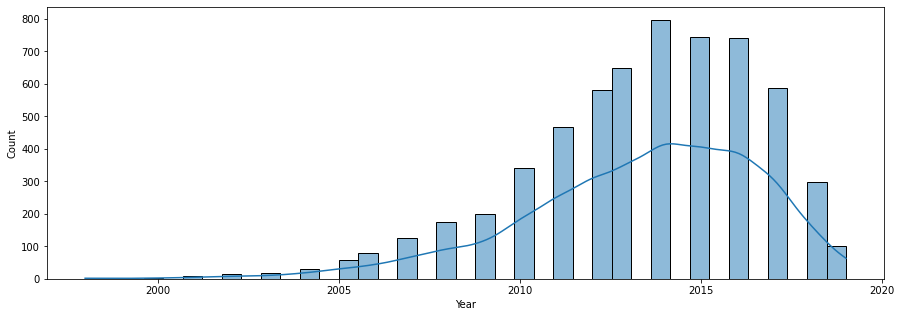

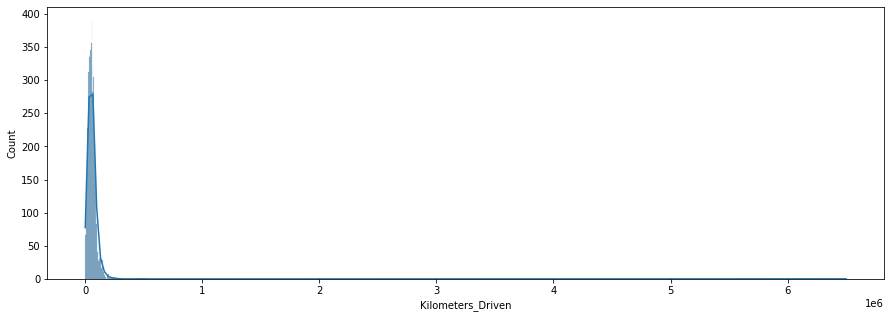

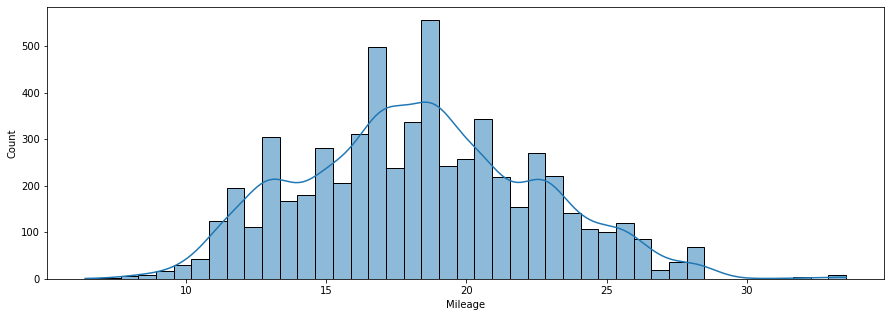

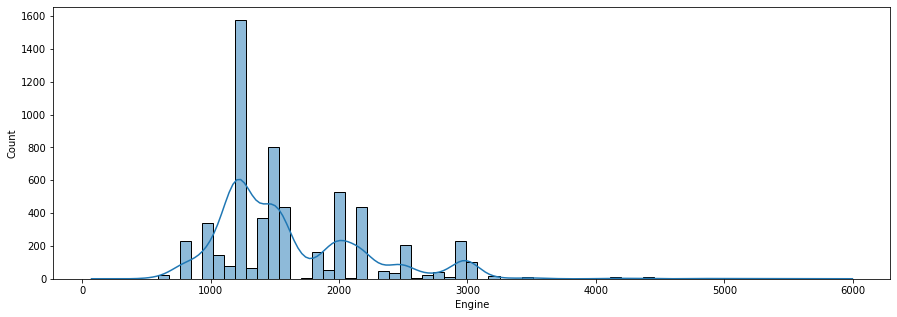

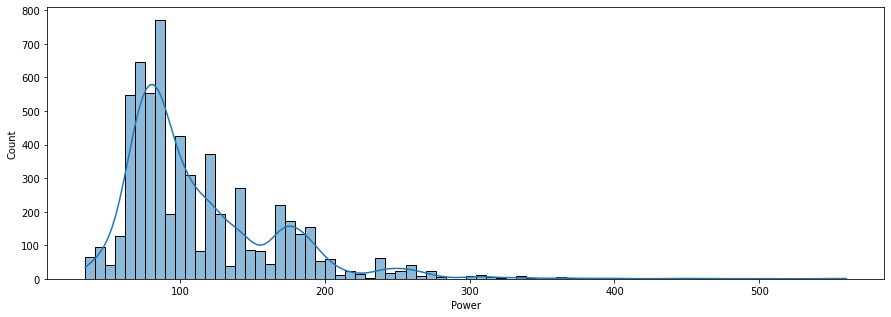

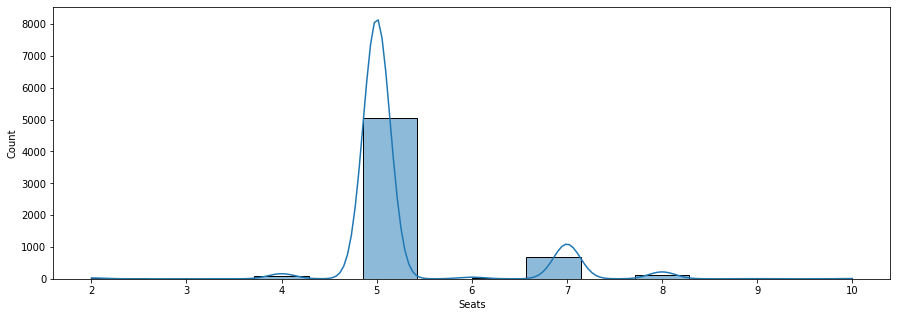

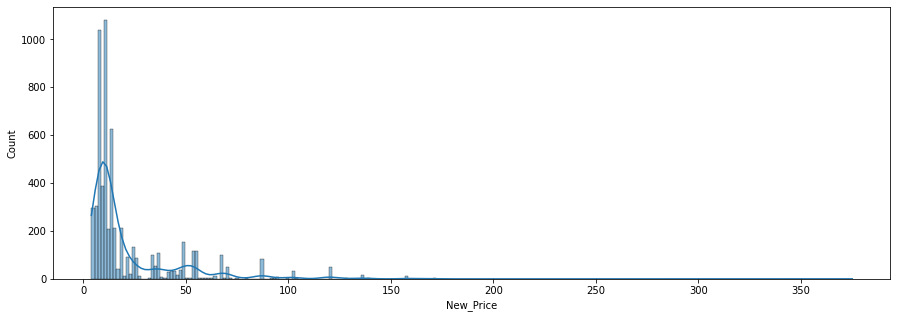

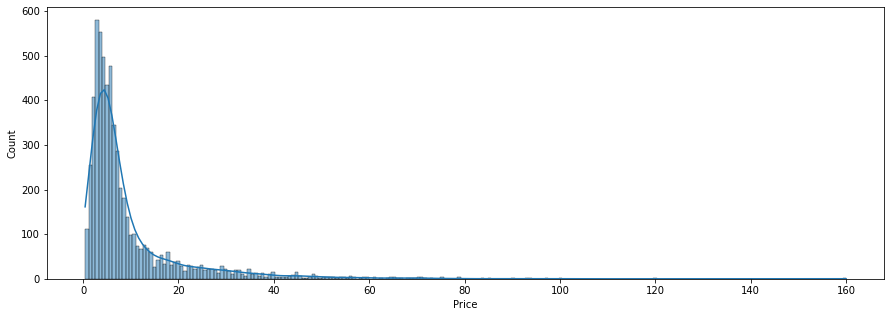

In [ ]:
#Plot histograms for all the numerical variables in the dataset
numerical_columns = data.select_dtypes('number').columns.tolist()
for col in numerical_columns:
  plt.figure(figsize=(15,5))
  sns.histplot(data=data, x= col, kde=True)
  plt.show()

**Observations from the histograms**

*   Mileage seems to be the only numerical variable with normally distributed data
*   Year is negatively skewed
*   Price, New_Price, Kilometers_Driven, Power and Engine all seem to be positively skewed
*   Seats is categorical but not converting the type just yet as we want to infer the correlation between Seats and Price.









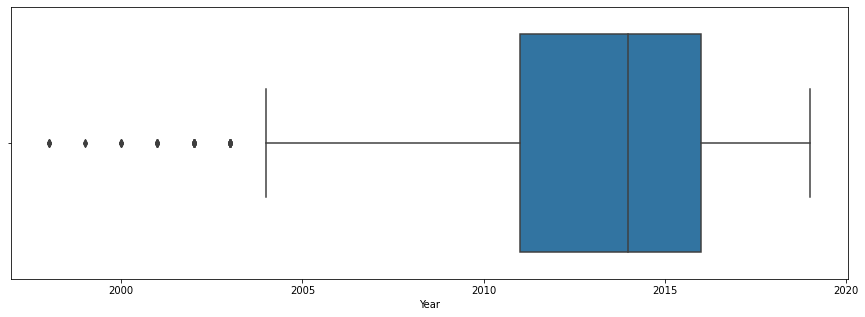

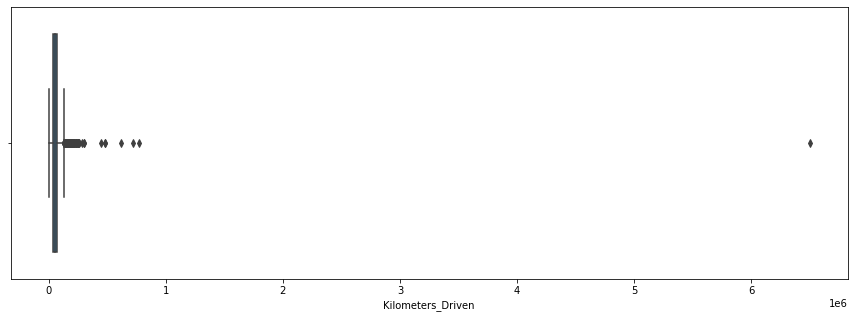

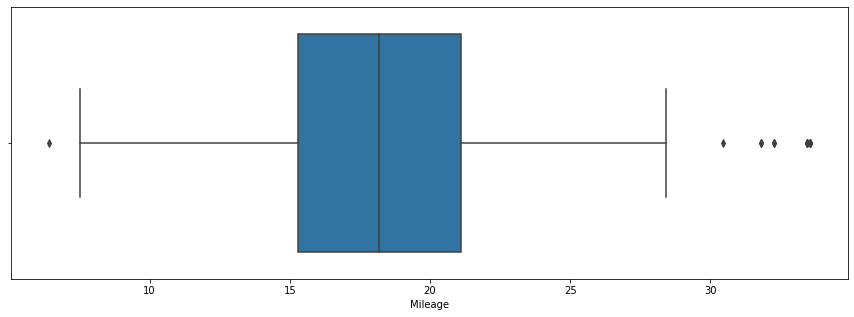

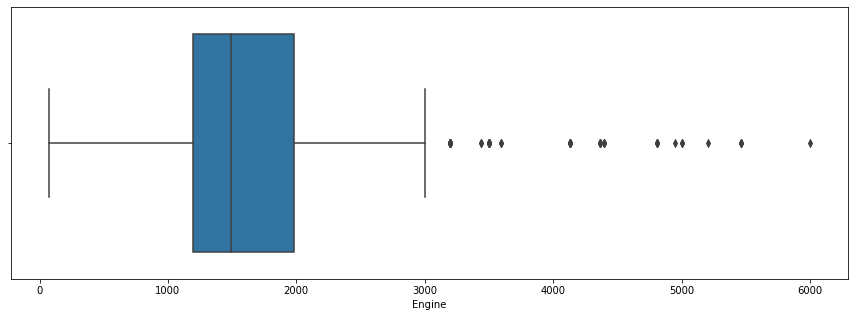

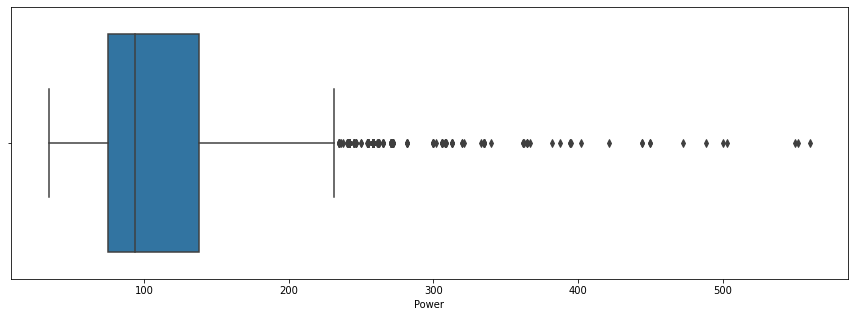

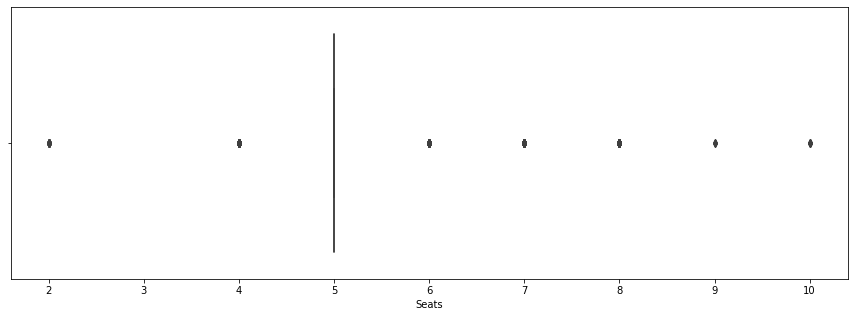

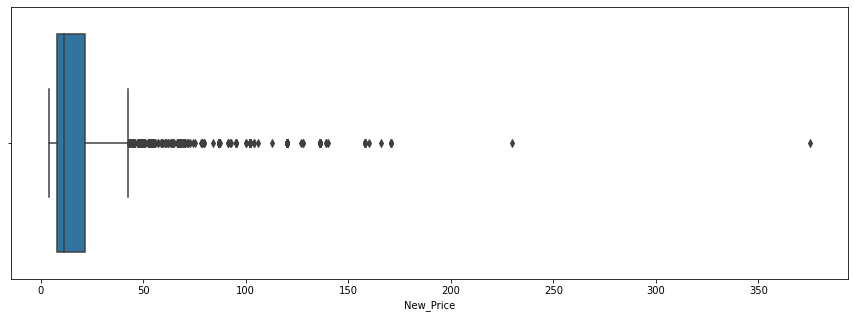

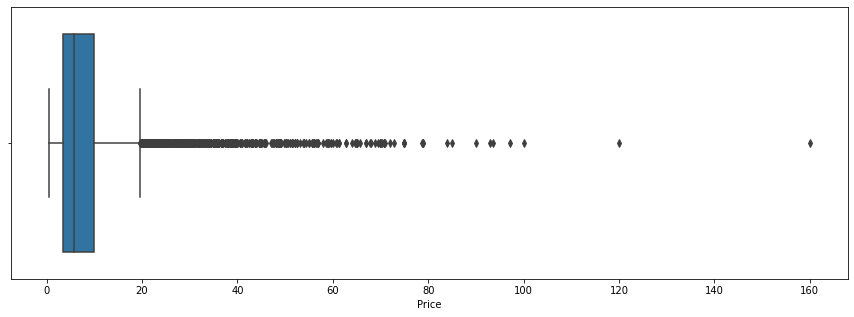

In [ ]:
#In order to get an idea of the outliers, lets plot a boxchart for all the numerical variables in the dataset
for col in numerical_columns:
  plt.figure(figsize=(15,5))
  sns.boxplot(data=data, x= col)
  plt.show()

**Inferences from the Box Plots**
*   All the numeric columns have outliers.
*   Year and Mileage have outliers to the left (values below the lower limit)
*   Price, New_Price, Kilometers_Driven,Power, Engine & Mileage all have outliers to the right (values higher than the higher limit)





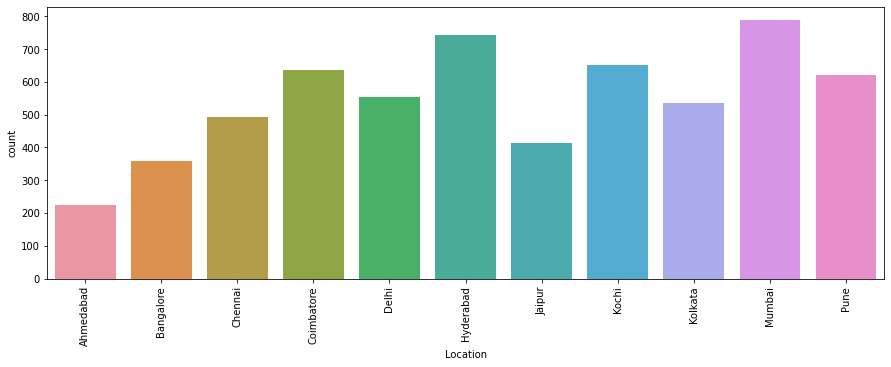

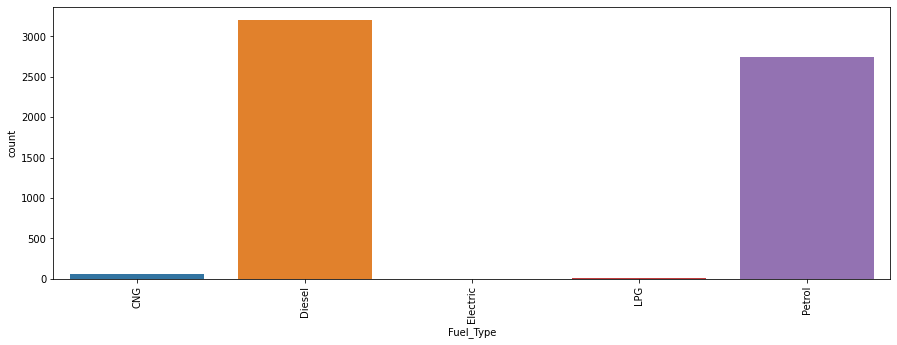

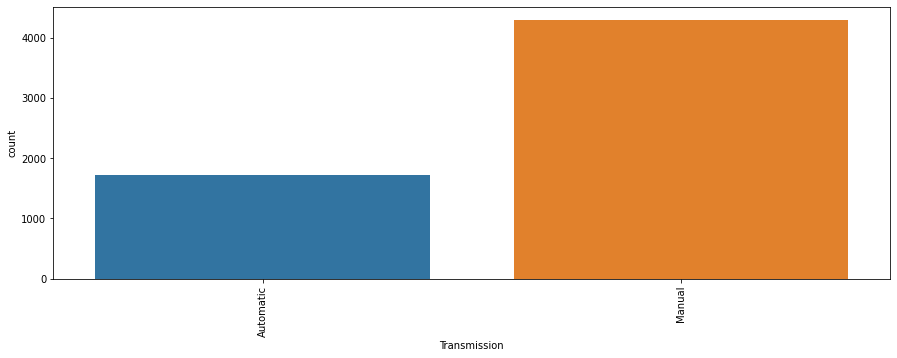

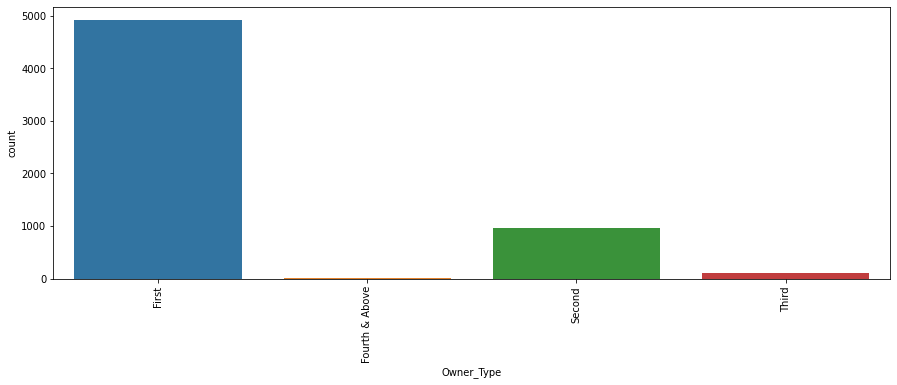

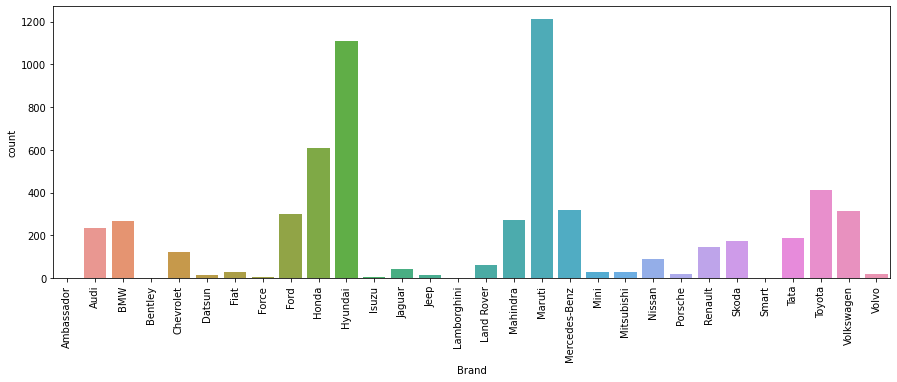

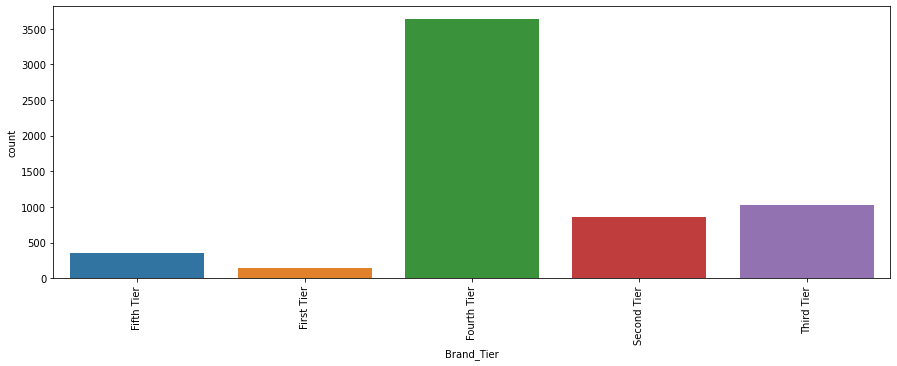

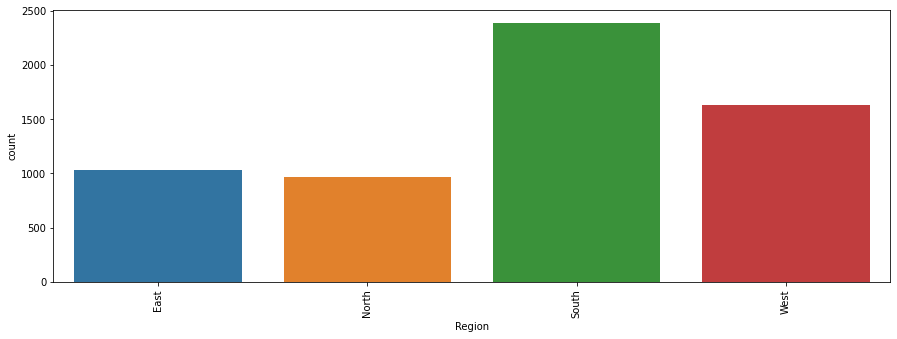

In [ ]:
#Count plots for all the categorical variables in the dataset
categorical_columns = data.select_dtypes('category').columns.tolist()

for col in categorical_columns:
  plt.figure(figsize=(15,5))
  plt.xticks(rotation=90)
  sns.countplot(data=data, x= col)
  plt.show()

**Inferences from the Count Plots **

*   Location - Mumbai holds the most inventory followed by Hyderabad and Kochi. Ahmedabad and Bangalore are the least popular cities for used car sales.
*   Fuel_Type - Diesel cars are popular/majority of the inventory
*   Transmission - Manual cars dominate in numbers compared to Automated 
*   Owner_Type - Cars previously owned by a single owner are the majority in the inventory
*   Brand - Maruti is the most sold/available Brand followed by Hyundai & Honda
*   Region - Most cars available/sold are from the South ( The cities Hyderabad, Kochi, Bangalore and Coimbatore constitue South)








**Bivariate Analysis**

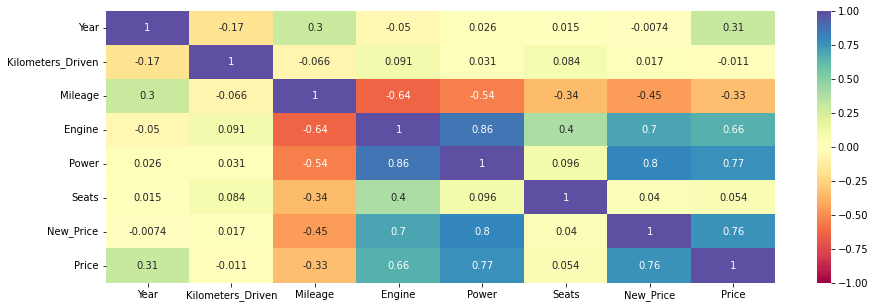

In [ ]:
#Let us draw the correlation map
plt.figure(figsize=(15,5))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, cmap='Spectral');

**Positive and negative correlations**

**Positive correlations**

  **Strong**

There is a strong positive correlation between Power and Price.

There is a strong positive correlation between New_Price and Price.

There is also a strong positive correlation between the independent variables Engine and Power.

There is a strong positive correlation between the independent variables Power and New_Price.

  **Medium**

There is a positive correlation between Engine and Price.

There is a positive correlation between New_Price and Engine.

**Negative correlations**

  **Medium**

There is a negative correlation between the independent variables Engine and Mileage.

There is a negative correlation between the independent variables New_Price and Mileage.

There is a negative correlation between the independent variables like Power and Mileage.

  **Low**
  
Kilometers_Driven and Mileage have a negative correlation with the dependent variable, Price.

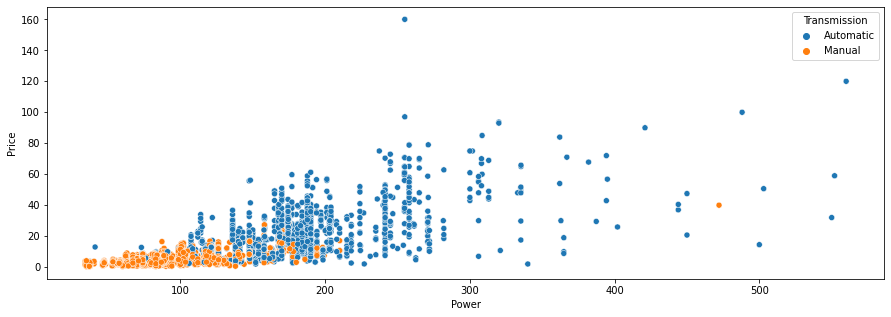

In [ ]:
#Lets draw the graphical representation of the correation between the independent variables and the dependent variable, Price 
plt.figure(figsize=(15,5))
sns.scatterplot(data=data,x='Power', y='Price', hue='Transmission');

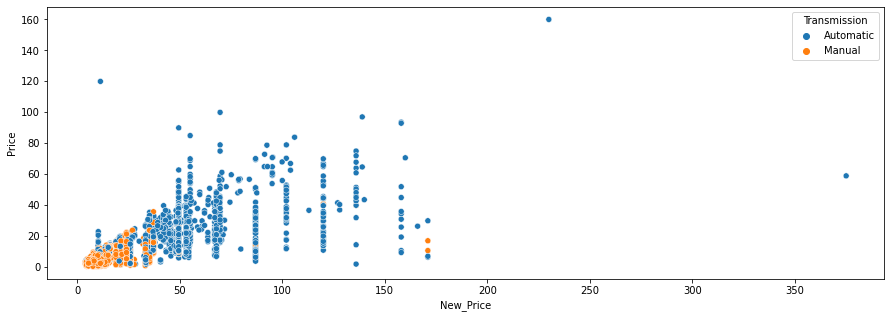

In [ ]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=data,x='New_Price', y='Price', hue='Transmission');

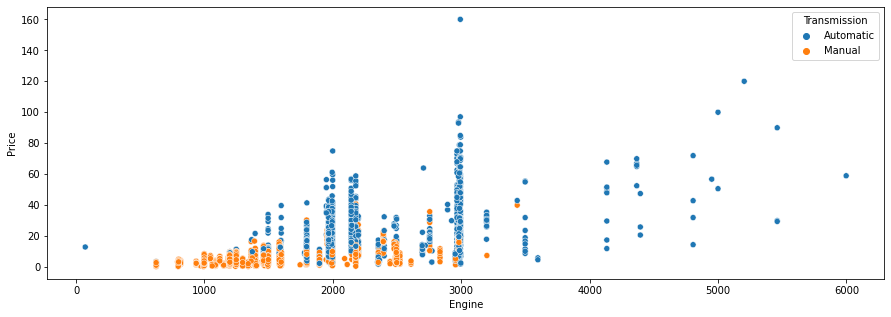

In [ ]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=data,x='Engine', y='Price',hue='Transmission');

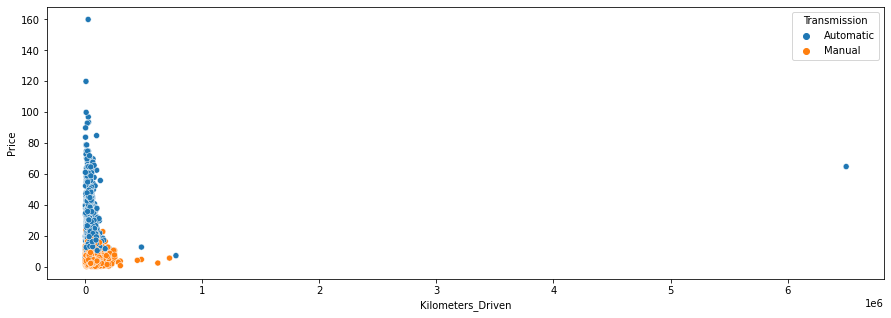

In [ ]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=data,x='Kilometers_Driven', y='Price',hue='Transmission')

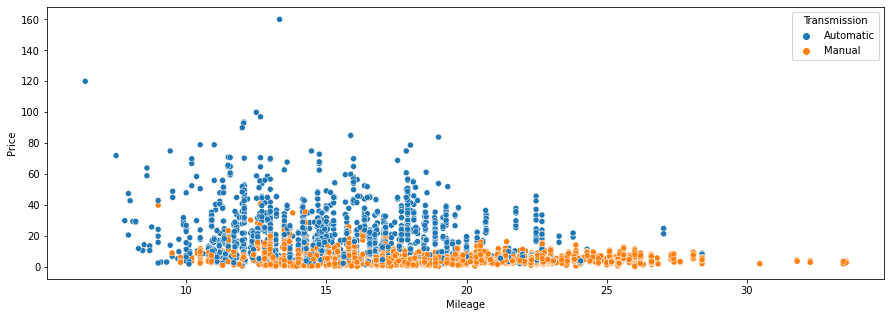

In [ ]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=data,x='Mileage', y='Price',hue='Transmission')

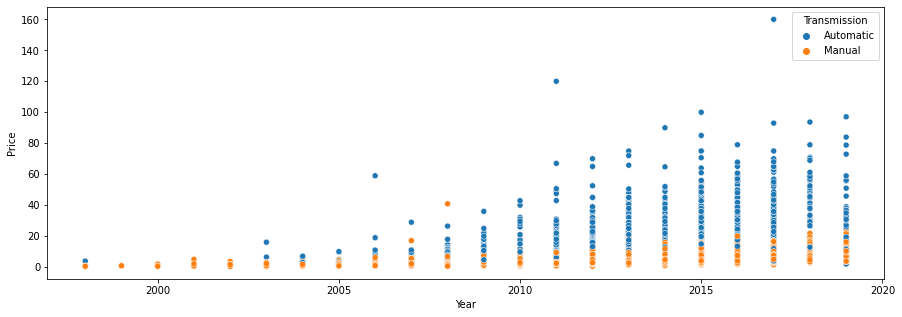

In [ ]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=data,x='Year', y='Price',hue='Transmission');

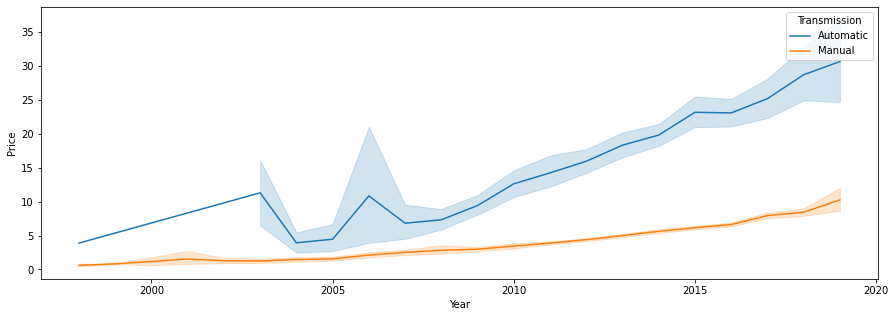

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(data=data, x='Year', y='Price', hue='Transmission');

The Line plot shows a positive correlation between the Year and Price

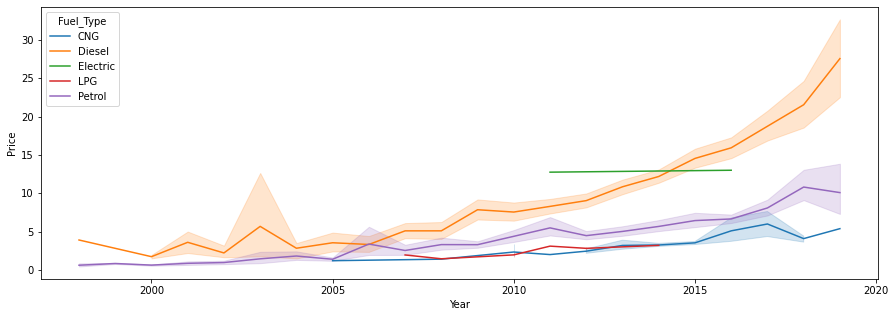

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(data=data, x='Year', y='Price', hue='Fuel_Type');

Contrary to intution, the market for Electric used cars doesnt seem to have really taken off. 

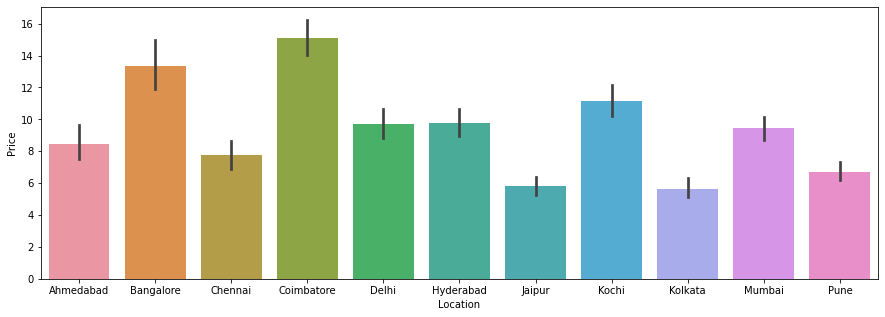

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(data=data, x='Location', y='Price');

Cars sold/available in Coimbatore seem to be priced high followed by the cars in Bangalore and Kochi. All these 3 cities are in the South. Jaipur (North) and Kolkata (East) seem to have sold/hold cars at a lower price.

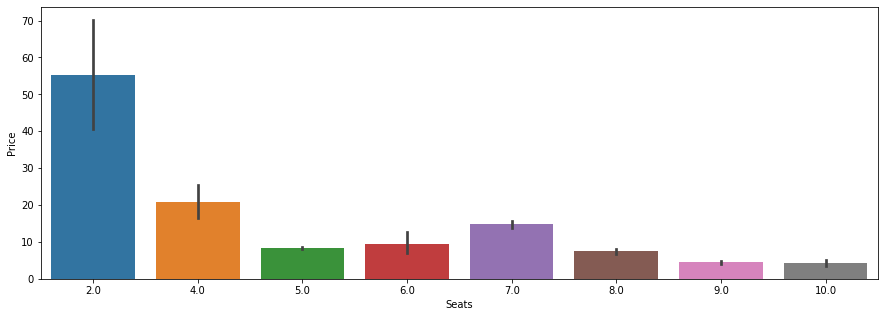

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(data=data, x='Seats', y='Price');

2-Seaters are the most expensive

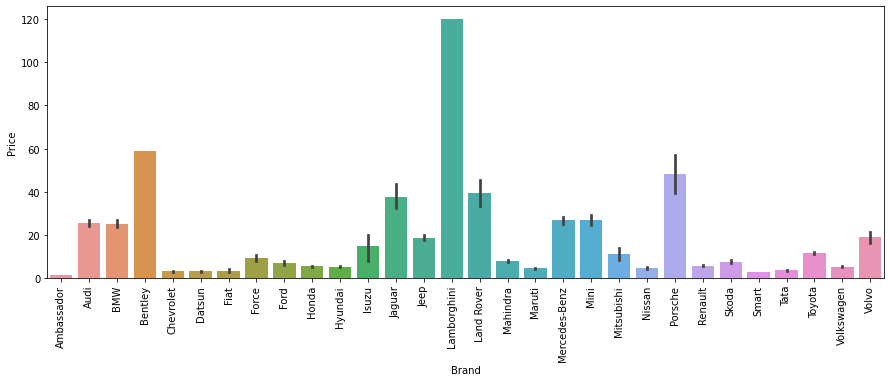

In [ ]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.barplot(data=data, x='Brand', y='Price');

Lamborghini, Bentley and Porsche are the expensive cars while Ambassador seems to be the cheapest.

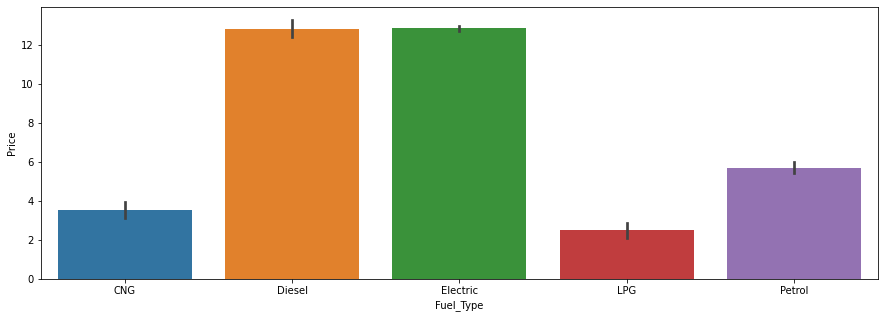

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(data=data, x='Fuel_Type', y='Price');

Diesel and Electric cars seem to be the priciest while LPG cars are the cheapest

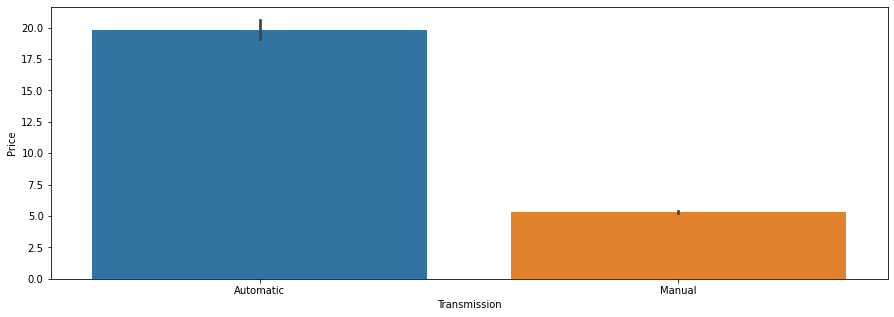

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(data=data, x='Transmission', y='Price');

Automatic cars are definitely pricier than Manual

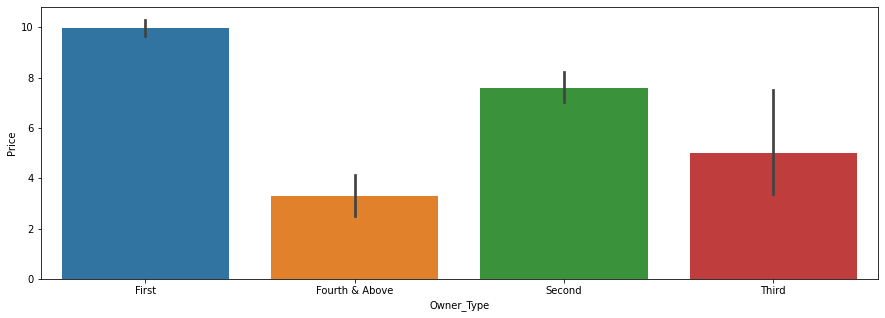

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(data=data, x='Owner_Type', y='Price');

Cars previously owned by a single owner seems to be priced higher.

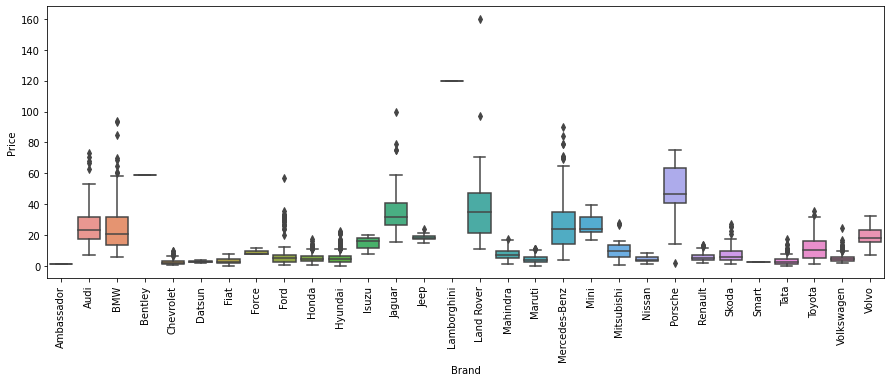

In [ ]:
#Price and New_Price both have many outliers. Let us see if these outliers are caused by the high end models and valid data
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.boxplot(data=data, x='Brand', y='Price');

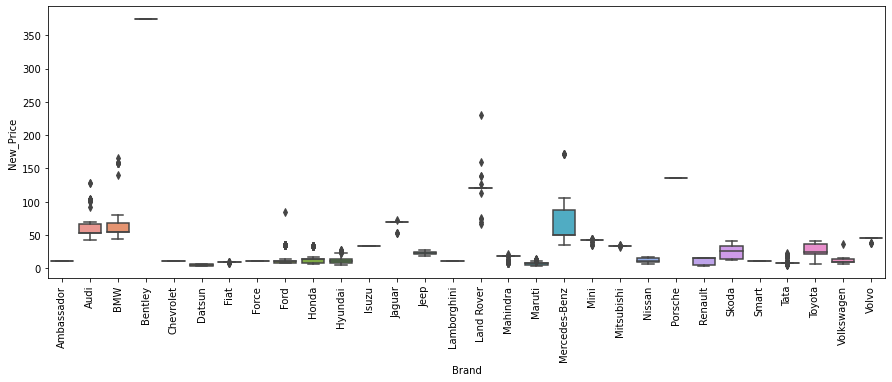

In [ ]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.boxplot(data=data, x='Brand', y='New_Price');

Most of the outliers are on the high end models - Audi, BMW, Jaguar, Mercedex, Volkswagen. Fired, Honda, Hundai, Chevrolet are all foreign brands (imported from outside India) and hence considered high end models in the indian market and these too have outliers.

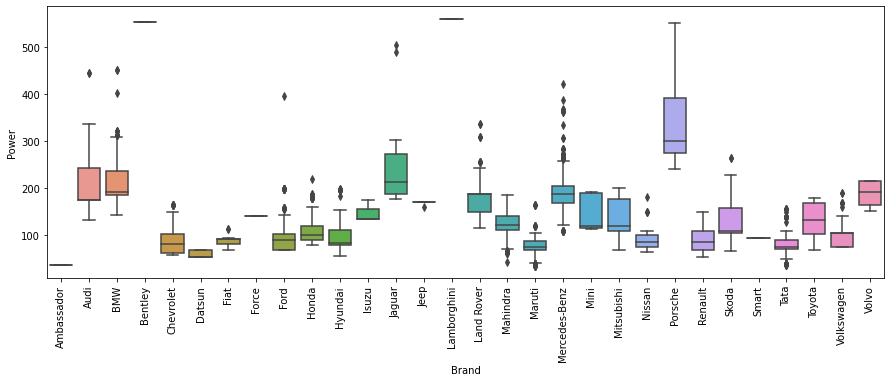

In [ ]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.boxplot(data=data, x='Brand', y='Power');

Majority of the outliers in the Power column seem to stem from the high-end brands and look legit.

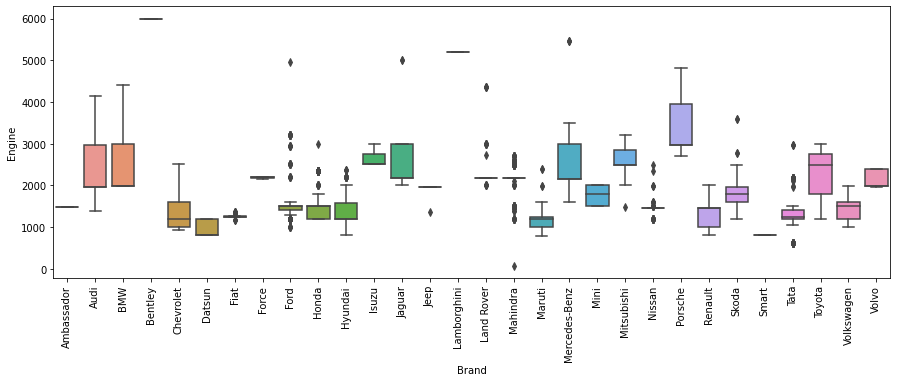

In [ ]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.boxplot(data=data, x='Brand', y='Engine');

Majority of the outliers seem to be from the high end brands.

In [ ]:
pd.set_option('display.max_rows', 500)
data.groupby(['Region','Brand_Tier'])['Price'].mean()

Region  Brand_Tier 
East    Fifth Tier      2.542436
        First Tier     34.438889
        Fourth Tier     4.261618
        Second Tier    22.279151
        Third Tier      7.104800
North   Fifth Tier      3.359167
        First Tier     40.427083
        Fourth Tier     4.505185
        Second Tier    21.087429
        Third Tier      9.002732
South   Fifth Tier      4.103937
        First Tier     42.167375
        Fourth Tier     6.211748
        Second Tier    29.477833
        Third Tier     10.383267
West    Fifth Tier      2.946907
        First Tier     28.965455
        Fourth Tier     4.843099
        Second Tier    22.076987
        Third Tier      8.536961
Name: Price, dtype: float64

Maruti, Hyundai and Honda are the most popular brands in the dataset and all these 3 Brands are categorized into the Fourth Tier. On an average, Cars in the Fourth Tier are priced higher in the South (6.2 Lakhs) and they are cheapest in the East.

**This concludes the Bivariate Analysis**

In [ ]:
#Let us take a look at the number of unique values in the Seat column and see if it could be converted into a categorical column
data['Seats'].nunique()

8

In [ ]:
#Since there are only 8 distinct values, converting seats into a categorical field
data["Seats"] = data["Seats"].astype("category")

In [ ]:
#Dropping the fields that will not be used for Model/Prediction
data.drop('Location', axis=1, inplace=True)
data.drop('Brand', axis=1, inplace=True)
data.drop('Name', axis=1, inplace=True)


In [ ]:
#Let us take a look at the data structure and the memory footprint should have come down as we have more category variables than when we started out
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Year               6019 non-null   int64   
 1   Kilometers_Driven  6019 non-null   int64   
 2   Fuel_Type          6019 non-null   category
 3   Transmission       6019 non-null   category
 4   Owner_Type         6019 non-null   category
 5   Mileage            6019 non-null   float64 
 6   Engine             6019 non-null   float64 
 7   Power              6019 non-null   float64 
 8   Seats              6019 non-null   category
 9   New_Price          6019 non-null   float64 
 10  Price              6019 non-null   float64 
 11  Brand_Tier         6019 non-null   category
 12  Region             6019 non-null   category
dtypes: category(6), float64(5), int64(2)
memory usage: 541.8 KB


**Outlier Detection and Treatment**

Outliers in all the columns except for the Kilometers_Driven column seem to be linked to the high end models and so justified. Kilometers_Driven is heavily skewed and the needs to be looked into.

In [ ]:
data['Kilometers_Driven'].max()

6500000

In [ ]:
# Detection and removal of outliers
def handle_outliers(data,colmn):
    
    # Q1 = 25th quantile
    Q1=data[colmn].quantile(0.25)
    
    # Q3 = 75th quantile
    Q3=data[colmn].quantile(0.75)
    
    # Calculating IQR
    IQR=Q3-Q1
    
    # Setting lower limit to Q1-1.5*IQR
    lower_limit = Q1 - 1.5*IQR
    if lower_limit < 0:
        lower_limit = 0
    
    
    # Setting upper limit to Q3+1.5*IQR
    upper_limit = Q3 + 1.5*IQR
       
 
    # Overwriting values lesser than the lower_limit with the lower_limit
    # Overwriting values greater than the upper_limit with the upper_limit
    data[colmn] = np.clip(data[colmn], lower_limit, upper_limit) 
    
    # returning clipped data
    return data




In [ ]:
#Detect and remove the outliers in Kilometers_Driven
data = handle_outliers(data,'Kilometers_Driven')

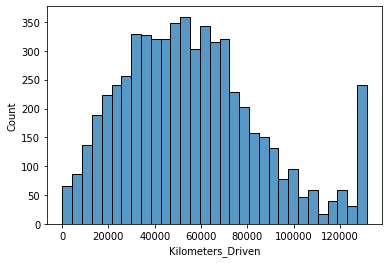

In [ ]:
#Now that we have clipped the outliers, lets take another look at the skewness in Kilometers_Driven
sns.histplot(data=data, x='Kilometers_Driven')

Outlier removal definitely helped with the skewness and we don't have to perform a log transformation.

In [ ]:
#Checking to see if there are zeros or negative values before executing log transformation
print('New_Price with values <=0 : ',data[data['New_Price']<=0.0].count().sum())
print('Price with values <=0 : ',data[data['Price']<=0.0].count().sum())
print('Power with values <=0 : ',data[data['Power']<=0.0].count().sum())
print('Engine with values <=0 : ',data[data['Engine']<=0.0].count().sum())
print('Year with values <=0 : ',data[data['Year']<=0.0].count().sum())


New_Price with values <=0 :  0
Price with values <=0 :  0
Power with values <=0 :  0
Engine with values <=0 :  0
Year with values <=0 :  0


**Log Transformation to smoothen the skewness**

In [ ]:
#Applying log to smoothen the skewness in both Price and New_Price columns 
data['New_Price_Log'] = np.log(data['New_Price'])
data['Price_Log'] = np.log(data['Price'])
data['Power_Log'] = np.log(data['Power'])
data['Engine_Log'] = np.log(data['Engine'])
data['Year_Log'] = np.log(data['Year'])

Now that we performed the log transformation, lets take another look at the skewness of New_Price, Price, Power, Engine and Year.

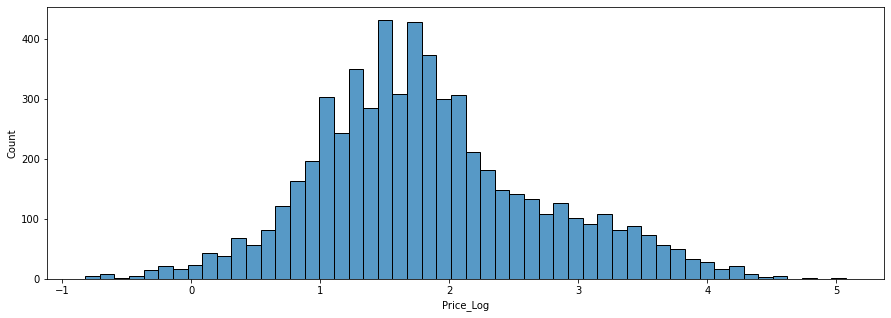

In [ ]:
plt.figure(figsize=(15,5))
sns.histplot(data=data, x='Price_Log');


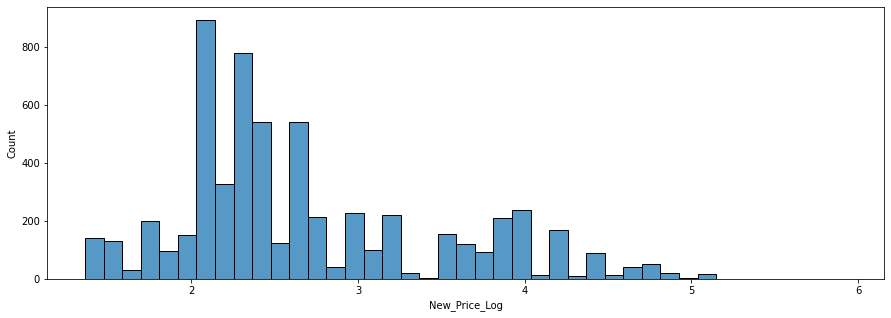

In [ ]:
plt.figure(figsize=(15,5))
sns.histplot(data=data, x='New_Price_Log');

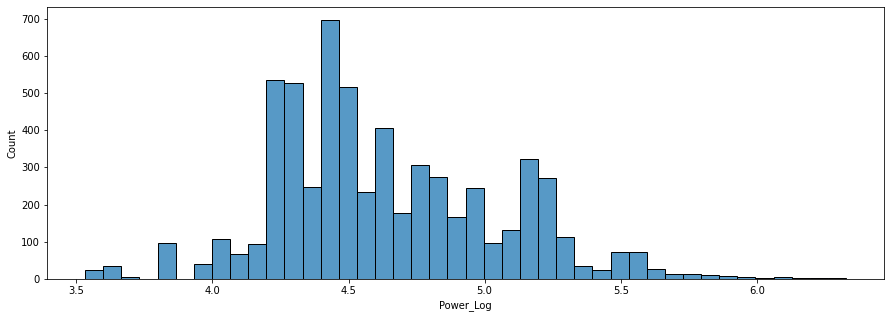

In [ ]:
plt.figure(figsize=(15,5))
sns.histplot(data=data, x='Power_Log');

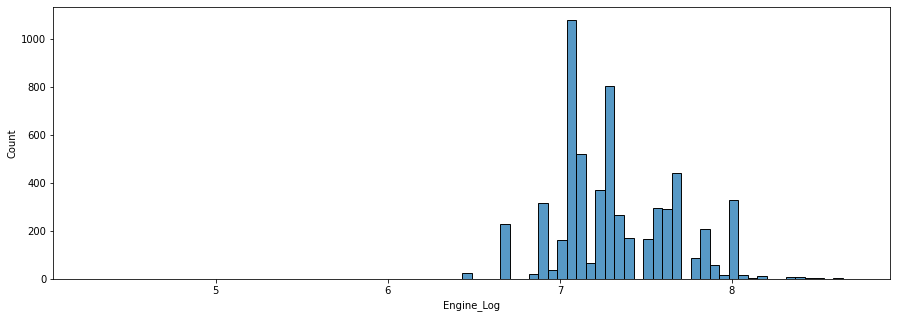

In [ ]:
plt.figure(figsize=(15,5))
sns.histplot(data=data, x='Engine_Log');

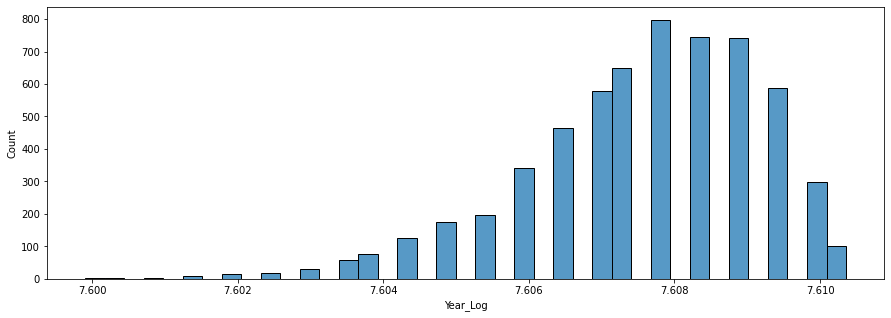

In [ ]:
plt.figure(figsize=(15,5))
sns.histplot(data=data, x='Year_Log');

Log transformation seem to have smoothened the skewness in Price, New_Price and the Power columns. Log transformation does not seem to have helped Year and Engine.

In [ ]:
data.drop('Year_Log', axis=1, inplace=True)
data.drop('Engine_Log', axis=1, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Year               6019 non-null   int64   
 1   Kilometers_Driven  6019 non-null   float64 
 2   Fuel_Type          6019 non-null   category
 3   Transmission       6019 non-null   category
 4   Owner_Type         6019 non-null   category
 5   Mileage            6019 non-null   float64 
 6   Engine             6019 non-null   float64 
 7   Power              6019 non-null   float64 
 8   Seats              6019 non-null   category
 9   New_Price          6019 non-null   float64 
 10  Price              6019 non-null   float64 
 11  Brand_Tier         6019 non-null   category
 12  Region             6019 non-null   category
 13  New_Price_Log      6019 non-null   float64 
 14  Price_Log          6019 non-null   float64 
 15  Power_Log          6019 non-null   float64 
dtypes: cat

**Moving onto Model Creation**

**Model 1** 

**Identifying the independent variables for the Model**

In [ ]:
#Defining x (independent) and y(dependent) variables
x1 = data[['Region', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission','Owner_Type', 'Mileage', 'Engine', 'Power_Log', 'Seats', 'Brand_Tier','New_Price_Log']]
y1 = data[['Price']]

#Creating Dummy Variables
x1 = pd.get_dummies(x1, columns=['Region', 'Fuel_Type','Transmission','Owner_Type','Brand_Tier','Seats'], drop_first=True)
x1.head()

,Year,Kilometers_Driven,Mileage,Engine,Power_Log,New_Price_Log,Region_North,Region_South,Region_West,Fuel_Type_Diesel,...,Brand_Tier_Fourth Tier,Brand_Tier_Second Tier,Brand_Tier_Third Tier,Seats_4.0,Seats_5.0,Seats_6.0,Seats_7.0,Seats_8.0,Seats_9.0,Seats_10.0
0,2010,72000.0,26.60,998.0,4.063198,1.706565,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
1,2015,41000.0,19.67,1582.0,4.837868,2.776332,0,0,1,1,...,1,0,0,0,1,0,0,0,0,0
2,2011,46000.0,18.20,1199.0,4.485260,2.152924,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,2012,87000.0,20.77,1248.0,4.485936,2.422144,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
4,2013,40670.0,15.20,1968.0,4.947340,3.972930,0,1,0,1,...,0,1,0,0,1,0,0,0,0,0


In [ ]:
# To check model performance
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Adjusted R^2
def adj_r2(ind_vars, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = ind_vars.shape[0]
    k = ind_vars.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

def mape(targets, predictions):
    return np.mean(np.abs((targets - predictions)) / targets) * 100

# Model performance check
def model_perf(model, input, actuals):

    y_predictions = model.predict(input)
    y_actuals = actuals.values

    return pd.DataFrame(
        {
            "RMSE": np.sqrt(mean_squared_error(y_actuals, y_predictions)),
            "MAE": mean_absolute_error(y_actuals, y_predictions),
            "MAPE": mape(y_actuals, y_predictions),
            "R^2": r2_score(y_actuals, y_predictions),
            "Adjusted R^2": adj_r2(input, y_actuals, y_predictions),
        },
        index=[0],
    )

**Model 1 Creation**

In [ ]:
def generate_lin_model(x,y):
    #Splitting the data into Training(70%) & Test(30%) datasets
    from sklearn.model_selection import train_test_split
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

    #printing shape of training and test datasets
    print("x_train:",x_train.shape)
    print("x_test:",x_test.shape)
    print("y_train:",y_train.shape)
    print("y_test:",y_test.shape)
    print("\nIndependent variables for model :", x.columns)
    print("\nDependent variable for model :", y.columns)
  

    #Fitting Linear model
    lin_reg_model = LinearRegression()
    lin_reg_model.fit(x_train, y_train)

    print("Intercept of the linear equation:", lin_reg_model.intercept_) 
    print("\nCoefficients of the equation are:", lin_reg_model.coef_)

    # Checking model performance on train set
    print("\nTraining Performance")
    display(model_perf(lin_reg_model, x_train, y_train))

    # Checking model performance on test set
    print("\nTest Performance")
    display(model_perf(lin_reg_model, x_test, y_test)) 

In [ ]:
#Invoke model creation, fitting, prediction and metrics generation
generate_lin_model(x1,y1)

x_train: (4213, 28)
x_test: (1806, 28)
y_train: (4213, 1)
y_test: (1806, 1)

Independent variables for model : Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power_Log',
       'New_Price_Log', 'Region_North', 'Region_South', 'Region_West',
       'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Manual', 'Owner_Type_Fourth & Above',
       'Owner_Type_Second', 'Owner_Type_Third', 'Brand_Tier_First Tier',
       'Brand_Tier_Fourth Tier', 'Brand_Tier_Second Tier',
       'Brand_Tier_Third Tier', 'Seats_4.0', 'Seats_5.0', 'Seats_6.0',
       'Seats_7.0', 'Seats_8.0', 'Seats_9.0', 'Seats_10.0'],
      dtype='object')

Dependent variable for model : Index(['Price'], dtype='object')
Intercept of the linear equation: [-1627.26667937]

Coefficients of the equation are: [[ 8.09805846e-01 -2.79934606e-05  9.52776702e-03  5.23027457e-03
   2.35107626e+00  1.53909166e+00  2.53200824e-01  1.56670018e+00
  -9.87350006e-03  1.52315117e-01 

,RMSE,MAE,MAPE,R^2,Adjusted R^2
0,5.360309,3.071822,59.562074,0.769484,0.767941



Test Performance


,RMSE,MAE,MAPE,R^2,Adjusted R^2
0,5.8741,3.045312,60.036198,0.726781,0.722476


**We are able to explain 76% of the variance in Price within the training data and with regards to the test data, we are able to explain 72% of the variance in the Price variable.** 

**Model 2 - Let us create another model using the exact same independent variables as Model1, but Price_Log as the dependent variable (vs Price used in Model 1). 
Since we are using the log transformation of the dependent variable, we will have to do reverse transformation when generating the metrics**

In [ ]:
#Defining x (independent) and y(dependent) variables for Model 2
x3 = data[['Region', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission','Owner_Type', 'Mileage', 'Engine', 'Power_Log', 'Seats', 'Brand_Tier', 'New_Price_Log']]
y3 = data[['Price_Log']]

#Creating Dummy Variables
print('\nCreating dummy variables for categorical features:')
x3 = pd.get_dummies(x3, columns=['Region', 'Fuel_Type','Transmission','Owner_Type','Brand_Tier','Seats'], drop_first=True)
x3.head()


Creating dummy variables for categorical features:


,Year,Kilometers_Driven,Mileage,Engine,Power_Log,New_Price_Log,Region_North,Region_South,Region_West,Fuel_Type_Diesel,...,Brand_Tier_Fourth Tier,Brand_Tier_Second Tier,Brand_Tier_Third Tier,Seats_4.0,Seats_5.0,Seats_6.0,Seats_7.0,Seats_8.0,Seats_9.0,Seats_10.0
0,2010,72000.0,26.60,998.0,4.063198,1.706565,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
1,2015,41000.0,19.67,1582.0,4.837868,2.776332,0,0,1,1,...,1,0,0,0,1,0,0,0,0,0
2,2011,46000.0,18.20,1199.0,4.485260,2.152924,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,2012,87000.0,20.77,1248.0,4.485936,2.422144,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
4,2013,40670.0,15.20,1968.0,4.947340,3.972930,0,1,0,1,...,0,1,0,0,1,0,0,0,0,0


In [ ]:
# Performance check for Model 2
def model_perf_log(model, input, actuals):
    '''Function to Generate KPIs if log transformation is applied on dependent variable'''
    y_predictions = np.exp(model.predict(input))   #reversing the log and applying exp function
    y_actuals = np.exp(actuals.values)            #log(y) => exp(y)

    return pd.DataFrame(
        {
            "RMSE": np.sqrt(mean_squared_error(y_actuals, y_predictions)),
            "MAE": mean_absolute_error(y_actuals, y_predictions),
            "MAPE": mape(y_actuals, y_predictions),
            "R^2": r2_score(y_actuals, y_predictions),
            "Adjusted R^2": adj_r2(input, y_actuals, y_predictions),
        },
        index=[0],
    )

**Model 2 Creation**

In [ ]:
#Model2 creation, fitting, predictions and metrics report
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x3, y3, test_size=0.3, random_state=1)

linregmodel = LinearRegression()
linregmodel.fit(x_train, y_train)

#printing shape of training and test datasets
print("x_train:",x_train.shape)
print("x_test:",x_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)
print("\nIndependent variables for model :", x_train.columns)
print("\nDependent variable for model :", y_train.columns)


#Fitting Linear model
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)


print("Intercept of the linear equation is:", lin_reg_model.intercept_) 
print("\nCoefficients of the equation are:", lin_reg_model.coef_)

# Checking model performance on train set
print("\nTraining Performance")
display(model_perf_log(lin_reg_model, x_train, y_train))
# Checking model performance on test set
print("\nTest Performance")
display(model_perf_log(lin_reg_model, x_test, y_test)) 

x_train: (4213, 28)
x_test: (1806, 28)
y_train: (4213, 1)
y_test: (1806, 1)

Independent variables for model : Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power_Log',
       'New_Price_Log', 'Region_North', 'Region_South', 'Region_West',
       'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Manual', 'Owner_Type_Fourth & Above',
       'Owner_Type_Second', 'Owner_Type_Third', 'Brand_Tier_First Tier',
       'Brand_Tier_Fourth Tier', 'Brand_Tier_Second Tier',
       'Brand_Tier_Third Tier', 'Seats_4.0', 'Seats_5.0', 'Seats_6.0',
       'Seats_7.0', 'Seats_8.0', 'Seats_9.0', 'Seats_10.0'],
      dtype='object')

Dependent variable for model : Index(['Price_Log'], dtype='object')
Intercept of the linear equation is: [-229.38404839]

Coefficients of the equation are: [[ 1.13188098e-01 -1.33782170e-06 -5.21544896e-03  1.22429009e-04
   5.57092626e-01  2.70036114e-01  3.40783817e-02  1.80840892e-01
   5.52930044e-02  8.3735843

,RMSE,MAE,MAPE,R^2,Adjusted R^2
0,4.121046,1.728696,19.011348,0.867182,0.866293



Test Performance


,RMSE,MAE,MAPE,R^2,Adjusted R^2
0,3.02478,1.54779,16.992904,0.922956,0.921742


Model 2 seems to perform better than Model 1. With Model 2, we are able to explain 86% of variance of Price within the training data and 92% of the variance in Price within the test data. With Model 1, we are abe to explain 72% of the variance in the Price. 

**Summary**


*   Maruti is the top most selling brand followed by Hyundai and Honda.Ambassador is the least selling Brand.

*   Most expensive car is Lamborghini followed by Bentley and Porsche. Ambassador is the cheapest.

*   The cars are priced the lowest in Jaipur and Kolkata. Cities in the south, Bangalore, Coimbatore, Hyderabad and Kochi seem to command higher prices.

*   Mumbai has the highest sales/inventory followed by Hyderabad and Kochi. Ahmedabad and Bangalore have the least sales/inventory. 

*   Manufacture year has positive impact. The newer the car, the higher the price.

*   Cars owned by one owner seem to be the most sold.

*   Manual cars are in demand compared to automatic.

*   Inspite of being expensive, diesel cars definitely are more in demand. I guess this is to do with the raise in petrol costs. Unfortunately, electric cars seem to be least in demand.

*   2 Seater cars are the most expensive.

*   5 Seater cars are most popular.

*   In line with intuition, cars with more mileage (translates to more wear and tear) have a negative impact on the price.

*  Higher the engine power, pricier the car. 

*  If the price of the new car goes up, its resale value seem to go up. 

**Recommendations:**

1 --> The cars are priced the lowest in Jaipur and Kolkata . Dealers could consider decreasing the sales/inventory in these 2 cities and increasing the inventory down South or add more locations. Cities in the south, Bangalore, Coimbatore, Hyderabad and Kochi seem to command high prices. 

2 --> Maruti, Honda and Hyndai are the highest selling brands. So filling up the inventory with more of these brads will be beneficial. 

3 --> Manufacture year has positive impact. The newer the car, the higher the price. Offering discounts on older cars and filling up the inventory with recent models would be beneficial. 

4 --> Cars owned by one owner seem to be the most sold. Offering discounts and cleaning up the inventory of cars owned by multiple owners might do good 

5 --> Though manual cars are the most sold, it might be profitable to acquire more Automatic cars to earn more profits, as these cars sell at higher prices.

6 --> With increasing petrol rates, diesel cars seem to be more in demand inspite of being pricier.

7 --> Ambassador is least priced and least sold, so could get away with not adding any more Ambassadors to the inventory.

8 --> Electric cars are priced high but do not seem to have a demand. Promoting electric cars might be profitable and ofcourse environment friendly.  



In [ ]:
#RECURSIVE FEATURE ELIMINATION
#Feature ranking with recursive feature elimination and cross-validated selection of the best number of features

from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
X = x_train
y = y_train
names=pd.DataFrame(x_train.columns)

#use linear regression as the model
lin_reg = LinearRegression()

#This is to select 5 variables: can be changed and checked in model for accuracy
#rfe_mod = RFE(lin_reg, 5, step=1) #RFECV(lin_reg, step=1, cv=5) 
rfe_mod = RFECV(lin_reg, step=1, cv=5) 
myvalues=rfe_mod.fit(X,y) #to fit
myvalues.support_#The mask of selected features.
myvalues.ranking_ #The feature ranking, such that ranking_[i] corresponds to the ranking position of the i-th feature. Selected (i.e., estimated best) features are assigned rank 1.

rankings=pd.DataFrame(myvalues.ranking_) #Make it into data frame
rankings

,0
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [ ]:
#Concat and name columns
ranked=pd.concat([names,rankings], axis=1)
ranked.columns = ["Feature", "Rank"]
ranked

#Select most important (Only 1's)
most_important = ranked.loc[ranked['Rank'] ==1] 
print(most_important)

most_important['Rank'].count()

                      Feature  Rank
0                        Year     1
1           Kilometers_Driven     1
2                     Mileage     1
3                      Engine     1
4                   Power_Log     1
5               New_Price_Log     1
6                Region_North     1
7                Region_South     1
8                 Region_West     1
9            Fuel_Type_Diesel     1
10         Fuel_Type_Electric     1
11              Fuel_Type_LPG     1
12           Fuel_Type_Petrol     1
13        Transmission_Manual     1
14  Owner_Type_Fourth & Above     1
15          Owner_Type_Second     1
16           Owner_Type_Third     1
17      Brand_Tier_First Tier     1
18     Brand_Tier_Fourth Tier     1
19     Brand_Tier_Second Tier     1
20      Brand_Tier_Third Tier     1
21                  Seats_4.0     1
22                  Seats_5.0     1
23                  Seats_6.0     1
24                  Seats_7.0     1
25                  Seats_8.0     1
26                  Seats_9.

28

In [ ]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

reg = LinearRegression()

# Build step forward feature selection
sfs = SFS(
    reg,
    k_features=x_train.shape[1],
    forward=True,  # k_features denotes the number of features to select
    floating=False,
    scoring="r2",
    n_jobs=-1,  # n_jobs=-1 means all processor cores will be used
    verbose=2,
    cv=5,
)

# Perform SFFS
sfs = sfs.fit(x_train, y_train)

ModuleNotFoundError: ignored